In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
i = 0
j = 0

In [2]:
RESULT_FOLDER_NAME = 'lastgraphs/results'
BULK_FOLDER_NAME = 'lastgraphs/bulks'
SEEN_BY_FOLDER_NAME = 'lastgraphs/seen_bys'

NO_JAM_DATE = "2024-06-06_23-31-26"
NORMAL_NO_JAM =  f"seen_by_normal_result_{NO_JAM_DATE}.txt"
MISINFO_NO_JAM = f"seen_by_misinfo_result_{NO_JAM_DATE}.txt"

JAMMED_DATE = "2024-06-07_00-23-58"
MISINFO_JAMMED =  f"seen_by_normal_result_{JAMMED_DATE}.txt"
NORMAL_JAMMED = f"seen_by_misinfo_result_{JAMMED_DATE}.txt"


LINE_TO_TEST = 111

In [3]:
def get_to_plot(file_name, line_to_test):
    path = os.path.join(SEEN_BY_FOLDER_NAME, file_name)
    lines1 = []
    with open(path, 'r') as f:
        lines1 = f.readlines()
    arr = np.array(list(map(int,lines1[line_to_test].strip().split(','))))
    index_1 = np.nonzero(arr)[0][0]
    reversed_arr = arr[::-1]
    non_zero_indices = np.nonzero(reversed_arr)[0]
    
    if non_zero_indices.size > 0:
        # The last non-zero value in the original array
        last_non_zero_value = reversed_arr[non_zero_indices[0]]
        # The index of the last non-zero value in the original array
        last_non_zero_index = len(arr) - 1 - non_zero_indices[0]
    to_plot = arr[index_1:last_non_zero_index + 1]
    return to_plot


In [4]:
def ploot(to_plot, to_plot2, jam, name=None):
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    
    x_size = max(len(to_plot), len(to_plot2))
    
    print(to_plot)
    print(to_plot2)
    if len(to_plot) == x_size:
        to_plot2 = np.append(to_plot2, [0] * (x_size-len(to_plot2)))
    else:
        to_plot = np.append(to_plot, [0] * (x_size-len(to_plot)))
    
    
    print(to_plot)
    print(to_plot2)
    
    cumsum_misinfo = np.cumsum(to_plot) / 600
    cumsum_normal = np.cumsum(to_plot2) / 600
    
    
    x = np.array(list(range(x_size)))
    
    
    plt.plot(x, cumsum_normal, color='#16a4f7', label=r'benign', lw=5, alpha=.7)
    plt.plot(x, cumsum_misinfo, color='#ff8324', label=r'misinformation', lw=5, alpha=.7)
    
    ax1.grid(color='black', linestyle='dotted')
    ax1.spines[['right', 'top']].set_visible(False)
    
    ax1.set_ylim(bottom=0, top=1.01)
    ax1.set_xlim(0)
    
    plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    
    plt.xlabel('Steps', fontsize=17)
    plt.ylabel('% of Users Received Message', fontsize=18)
    plt.legend(loc='lower right', fontsize='x-large')
    
    plt.setp(ax1.get_xticklabels(), fontsize=16)
    plt.setp(ax1.get_yticklabels(), fontsize=16)
    global j
    plt.gcf().subplots_adjust(bottom=0.15)
    if name:
        fig.savefig(f'{name}{j}' + ".pdf") 
    elif jam:
        fig.savefig(f'average_propagation_with_jam{j}' + ".pdf") 
    else:
        fig.savefig(f'average_propagation_with_no_jam{j}' + ".pdf") 
    j += 1
    plt.tight_layout()
    plt.show()

[ 1  4  5  7  8  8 11  6 13 19 17 20 29 25 23 33 43 35 40 41 43 49 25 23
 12 11 15 11 11  7  3  0  1  1]
[ 1  0  0  1  2  8  5 13 13 20 24 17 22 27 40 34 39 52 48 46 44 28 31 28
 21 10 12  2  6  1  3  1  1]
[ 1  4  5  7  8  8 11  6 13 19 17 20 29 25 23 33 43 35 40 41 43 49 25 23
 12 11 15 11 11  7  3  0  1  1]
[ 1  0  0  1  2  8  5 13 13 20 24 17 22 27 40 34 39 52 48 46 44 28 31 28
 21 10 12  2  6  1  3  1  1  0]


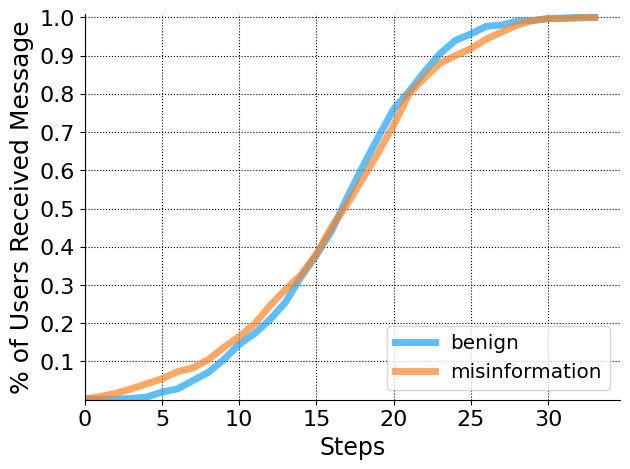

[ 1  1  0  1  2  4  7 14 14 23 36 31 46 44 50 42 35 41 39 35 36 30 23 10
 12  7  7  5  3  0  0  0  0  1]
[ 1  2  2  3  8  8 21 22 26 31 35 23 23 19 26 30 23 31 22 29 19 37 34 25
 28 23 20 11 11  5  2]
[ 1  1  0  1  2  4  7 14 14 23 36 31 46 44 50 42 35 41 39 35 36 30 23 10
 12  7  7  5  3  0  0  0  0  1]
[ 1  2  2  3  8  8 21 22 26 31 35 23 23 19 26 30 23 31 22 29 19 37 34 25
 28 23 20 11 11  5  2  0  0  0]


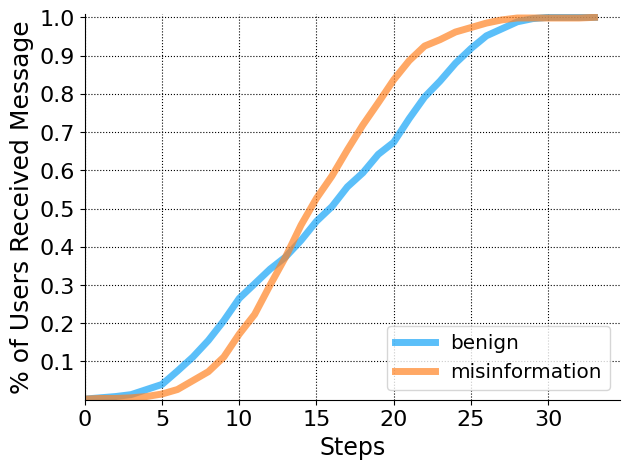

In [100]:
to_plot = get_to_plot(MISINFO_NO_JAM, 109)
to_plot2 = get_to_plot(NORMAL_NO_JAM, 131)

ploot(to_plot, to_plot2, False)

to_plot = get_to_plot(MISINFO_JAMMED, 111)
to_plot2 = get_to_plot(NORMAL_JAMMED, 190)

ploot(to_plot, to_plot2, True)

In [8]:
JAMMED_DATE_5 = "2024-06-07_00-28-00"
NORMAL_JAMMED_5 =  f"seen_by_normal_result_{JAMMED_DATE_5}.txt"
MISINFO_JAMMED_5 = f"seen_by_misinfo_result_{JAMMED_DATE_5}.txt"

JAMMED_DATE_10 = "2024-06-07_00-43-28"
NORMAL_JAMMED_10 = f"seen_by_misinfo_result_{JAMMED_DATE_10}.txt"
MISINFO_JAMMED_10 =  f"seen_by_normal_result_{JAMMED_DATE_10}.txt"

[ 1  1  5  8  7  9 16 30 27 41 41 41 61 53 46 41 38 22 23 24 17 15 13 11
  4  5]
[ 1  2  7  7  9 11 14 24 26 23 21 19 16 26 28 38 34 35 42 39 30 29 33 23
 23 14 12  9  2  3]
[ 1  1  5  8  7  9 16 30 27 41 41 41 61 53 46 41 38 22 23 24 17 15 13 11
  4  5  0  0  0  0]
[ 1  2  7  7  9 11 14 24 26 23 21 19 16 26 28 38 34 35 42 39 30 29 33 23
 23 14 12  9  2  3]


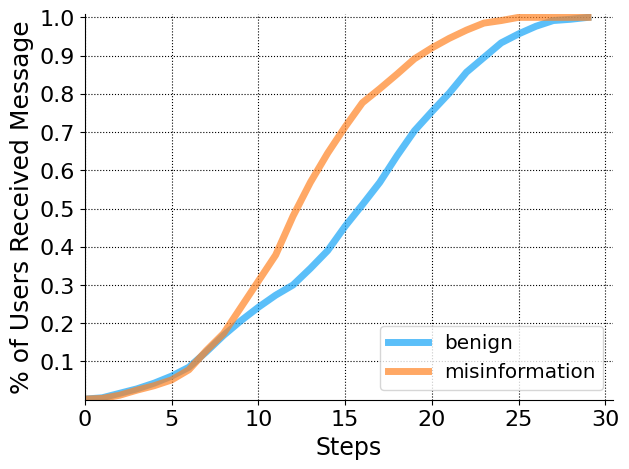

[ 1  0  2  3  9 11 14 23 31 36 19 27 21 26 26 27 40 38 45 35 34 38 37 19
 18  6  6  4  1  1  1  1]
[ 1  1  3  3  1  7  6 11 15 19 24 21 18 19 33 31 36 35 34 36 36 29 39 29
 27 12 19 17 10 20  6  1  1]
[ 1  0  2  3  9 11 14 23 31 36 19 27 21 26 26 27 40 38 45 35 34 38 37 19
 18  6  6  4  1  1  1  1  0]
[ 1  1  3  3  1  7  6 11 15 19 24 21 18 19 33 31 36 35 34 36 36 29 39 29
 27 12 19 17 10 20  6  1  1]


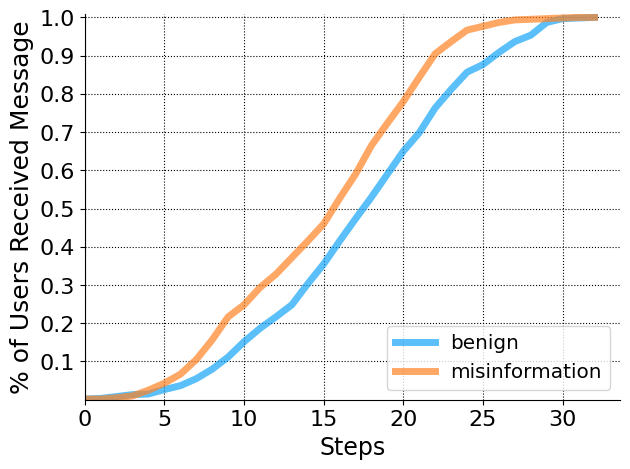

In [114]:
to_plot = get_to_plot(NORMAL_JAMMED_5, 109)
to_plot2 = get_to_plot(MISINFO_JAMMED_5, 129)

ploot(to_plot, to_plot2, True, "jammed_5_adversary")

to_plot = get_to_plot(NORMAL_JAMMED_10, 190)
to_plot2 = get_to_plot(MISINFO_JAMMED_10, 111)

ploot(to_plot, to_plot2, True, "jammed_10_adversary")

In [5]:
stupid = "2024-06-06_00-42-17"
NORMAL_stupid =  f"seen_by_normal_result_{stupid}.txt"
MISINFO_stupid = f"seen_by_misinfo_result_{stupid}.txt"

smart = "2024-06-06_00-26-36"
NORMAL_smart =  f"seen_by_normal_result_{smart}.txt"
MISINFO_smart = f"seen_by_misinfo_result_{smart}.txt"

super_stupid = "2024-06-06_01-17-18"
NORMAL_super_stupid =  f"seen_by_normal_result_{super_stupid}.txt"
MISINFO_super_stupid = f"seen_by_misinfo_result_{super_stupid}.txt"

super_smart = "2024-06-06_01-15-01"
NORMAL_super_smart = f"seen_by_misinfo_result_{super_smart}.txt"
MISINFO_super_smart =  f"seen_by_normal_result_{super_smart}.txt"

[ 1  0  1  1  3  2  8 11  7 21 25 31 44 35 33 30 39 34 43 40 26 22 24 24
 29 17 20 16  4  4  3  1  0  0  1]
[ 1  2  4  7 12 12 11 22 31 41 47 46 41 39 50 40 39 34 30 26 18 16 20  5
  4  0  2]
[ 1  0  1  1  3  2  8 11  7 21 25 31 44 35 33 30 39 34 43 40 26 22 24 24
 29 17 20 16  4  4  3  1  0  0  1]
[ 1  2  4  7 12 12 11 22 31 41 47 46 41 39 50 40 39 34 30 26 18 16 20  5
  4  0  2  0  0  0  0  0  0  0  0]


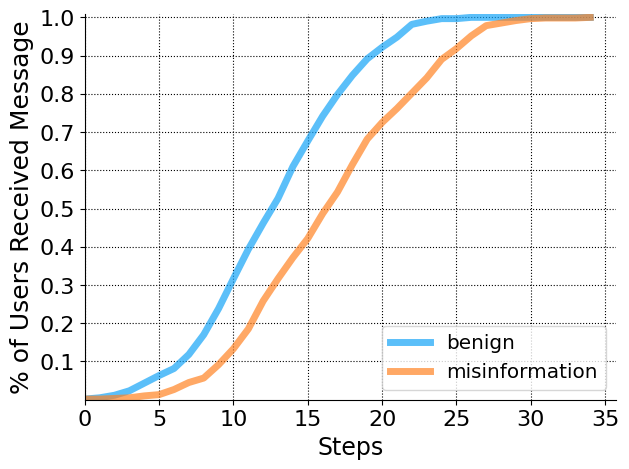

[ 1  1  2  5  8 12 19 30 31 30 25 32 37 44 41 40 48 29 30 35 29 29 17 15
  4  2  3  1]
[ 1  0  1  2  0  1  3  2 10 13 25 20 29 29 38 36 36 34 33 40 39 37 23 25
 30 21 26 25 14  3  2  1  1]
[ 1  1  2  5  8 12 19 30 31 30 25 32 37 44 41 40 48 29 30 35 29 29 17 15
  4  2  3  1  0  0  0  0  0]
[ 1  0  1  2  0  1  3  2 10 13 25 20 29 29 38 36 36 34 33 40 39 37 23 25
 30 21 26 25 14  3  2  1  1]


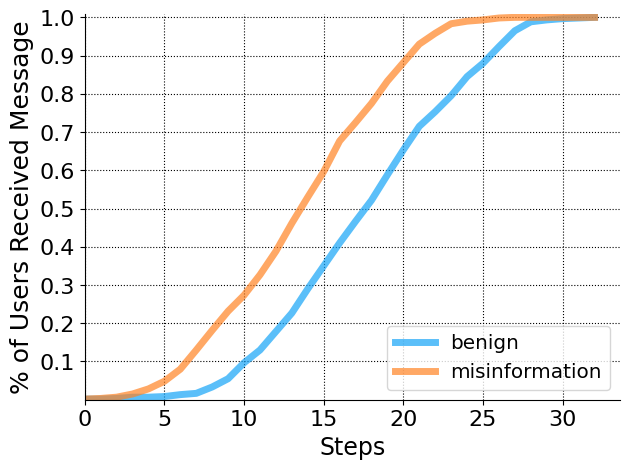

In [7]:
# to_plot = get_to_plot(NORMAL_stupid, 109)
# to_plot2 = get_to_plot(MISINFO_stupid, 129)

# ploot(to_plot, to_plot2, False, "stupid")


# to_plot = get_to_plot(NORMAL_smart, 109)
# to_plot2 = get_to_plot(MISINFO_smart, 129)

# ploot(to_plot, to_plot2, False, "smart")


to_plot = get_to_plot(NORMAL_super_stupid, 111)
to_plot2 = get_to_plot(MISINFO_super_stupid, 132)

ploot(to_plot, to_plot2, False, "super_stupid")


to_plot = get_to_plot(NORMAL_super_smart, 121)
to_plot2 = get_to_plot(MISINFO_super_smart, 140)

ploot(to_plot, to_plot2, False, "super_smart")

In [109]:
BULK_NO_JAM = "bulk_data_result_2024-06-06_00-05-56.txt"
BULK_WITH_JAM = "bulk_data_result_2024-06-06_00-06-00.txt"

LINES_OF_INTEREST = [5,6,7]
lines = []
with open(os.path.join(BULK_FOLDER_NAME,BULK_NO_JAM), 'r') as f:
    lines = f.readlines()

arr_80th = np.array(list(map(int,lines[LINES_OF_INTEREST[0]].strip().split(','))))
arr_90th = np.array(list(map(int,lines[LINES_OF_INTEREST[1]].strip().split(','))))
arr_full = np.array(list(map(int,lines[LINES_OF_INTEREST[2]].strip().split(','))))
mdata = [[8, 33.84197357569164 , 43.93896534017874 , 54.694607711162966],
         [

SyntaxError: incomplete input (4148038487.py, line 13)

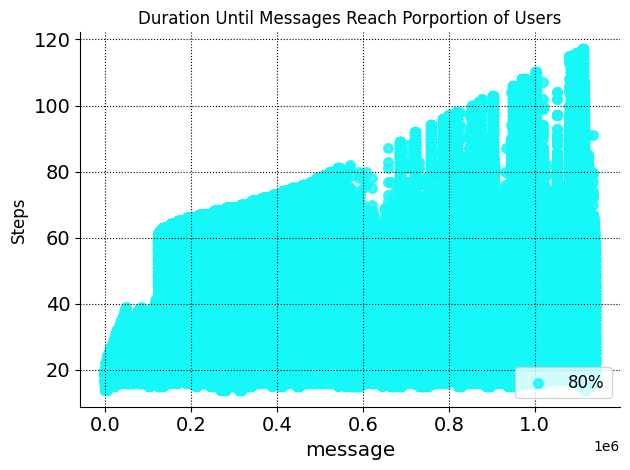

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

to_plot = arr_80th
# to_plot2 = arr_90th
# to_plot3 = arr_full

x_size = len(to_plot)


# cumsum_misinfo = np.cumsum(to_plot)
# cumsum_normal = np.cumsum(to_plot2)


x = np.array(list(range(x_size)))


plt.scatter(x, to_plot, color='#16f7f7', label=r'80%', lw=2, alpha=.8)
# plt.scatter(x, to_plot2, color='#fa9141', label=r'90%', lw=2, alpha=.8)
# plt.scatter(x, to_plot3, color='#a6a6a6', label=r'100%', lw=2, alpha=.8)

ax1.grid(color='black', linestyle='dotted')
ax1.spines[['right', 'top']].set_visible(False)


plt.title('Duration Until Messages Reach Porportion of Users')
plt.xlabel('message', fontsize='x-large')
plt.ylabel('Steps', fontsize='large')
plt.legend(loc='lower right', fontsize='large')

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

fig.savefig('message_propagation_delays_1' + ".pdf") 
plt.tight_layout()
plt.show()